# Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn import set_config

set_config(display='diagram')
from sklearn.linear_model import Ridge


In [2]:
df = pd.read_parquet('..//raw_data//coin_id_formated.parquet')

In [3]:
str_cols = ['id', 'symbol', 'name', 'asset_platform_id', 'hashing_algorithm','description','country_origin']
df[str_cols] = df[str_cols].astype(str)
float_cols = ['sentiment_votes_up_percentage', 'sentiment_votes_down_percentage','market_cap_rank', ]
df[float_cols] = df[float_cols].astype(float)
int_cols = ['coingecko_rank', 'coingecko_score','community_score', 'liquidity_score', 'twitter_followers',
       'telegram_channel_user_count']       
df[int_cols] = df[int_cols].astype(float)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               13675 non-null  object 
 1   symbol                           13675 non-null  object 
 2   name                             13675 non-null  object 
 3   asset_platform_id                13675 non-null  object 
 4   hashing_algorithm                13675 non-null  object 
 5   categories                       13675 non-null  object 
 6   description                      13675 non-null  object 
 7   country_origin                   13675 non-null  object 
 8   sentiment_votes_up_percentage    5466 non-null   float64
 9   sentiment_votes_down_percentage  5466 non-null   float64
 10  market_cap_rank                  3805 non-null   float64
 11  coingecko_rank                   13508 non-null  float64
 12  coingecko_score   

## Modelo de Regressao

###  Analise de Variaveis

In [21]:
df.mean()


/tmp/ipykernel_8892/972437606.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


sentiment_votes_up_percentage         72.713251
sentiment_votes_down_percentage       27.286760
market_cap_rank                     1907.155059
coingecko_rank                      6755.004590
coingecko_score                        7.799963
community_score                       10.932654
liquidity_score                        5.881238
twitter_followers                  38989.294651
telegram_channel_user_count        11826.939229
dtype: float64

<AxesSubplot:ylabel='Frequency'>

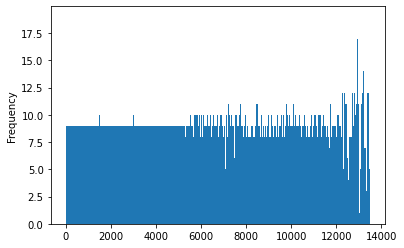

In [43]:
df[df['coingecko_rank'] != 0]['coingecko_rank'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

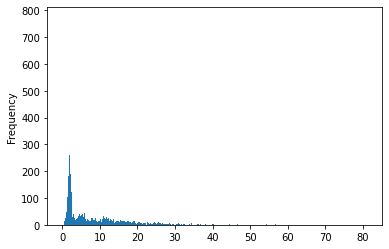

In [38]:
df[df['coingecko_score'] != 0]['coingecko_score'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

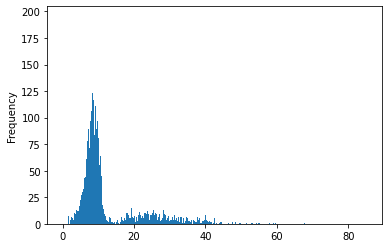

In [37]:
df[df['community_score'] != 0]['community_score'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

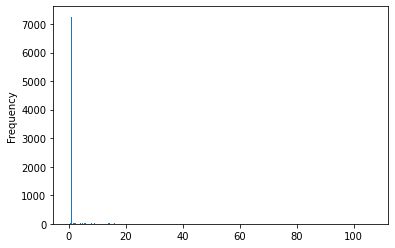

In [36]:
df[df['liquidity_score'] != 0]['liquidity_score'].plot(kind='hist', bins=1500)


<AxesSubplot:ylabel='Frequency'>

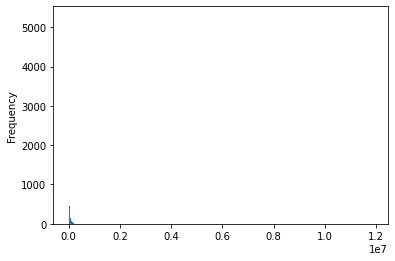

In [39]:
df[df['twitter_followers'] != 0]['twitter_followers'].plot(kind='hist',
                                                           bins=1500)


### Build Pipeline

#### Caso queira customizar alguma função

In [ ]:
def multiply(df):
    return pd.DataFrame(df['product_length_cm'] * df['product_height_cm'] *
                        df['product_width_cm'])


volume_computer = Pipeline([('compute_volume', FunctionTransformer(multiply)),
                            ('scale_volume', MinMaxScaler())])

final_preprocessor = ColumnTransformer([
    ('num_encoder', MinMaxScaler(),
     make_column_selector(dtype_include="int64")),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False),
     make_column_selector(dtype_include="object")),
    ('volume_computer', volume_computer,
     ['product_length_cm', 'product_height_cm', 'product_width_cm'])
])

pipe = Pipeline([('preprocessing', final_preprocessor),
                 ('linear_regression', Ridge())])

pipe

#### Caso use as padrões

In [13]:


final_preprocessor = ColumnTransformer([
    ('num_encoder', MinMaxScaler(),
     make_column_selector(dtype_include="int64")),

    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False),
     make_column_selector(dtype_include="object"))])

pipe = Pipeline([('preprocessing', final_preprocessor),
                 ('linear_regression', Ridge())])

pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_encoder', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f67b69d6af0>),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f67b69d6760>),
                                                 ('volume_computer',
                                                  Pipeline(steps=[('compute_volume',
                                                                   FunctionTransformer(func=<function multiply at 0x7f67b69dc430>)),
                                                                  ('scale_volume',
                                                                   MinMaxScaler())]),
                                                  ['product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm'])])),
                ('linear_regression', Ridge())])

In [44]:
pipe.fit_transform(df)

ValueError: A given column is not a column of the dataframe